<a href= "https://www.kaggle.com/mnassrib/telecom-churn-datasets">Orange Telecom Churn Dataset (Link to dataset)</a>

<h4>Objective</h4>
To predict if a customer will churn from Orange Telecom Company

<h5>Evaluation Metric</h5>
F1 Score

<b>Variable Definitions</b><br>
<ul>
    <li>State: State customer is located</li>
    <li>Account length: Customer account length in days</li>
    <li>Area code: Area code of customer's location</li>
    <li>Phone number: Customer Phonenumber</li>
    <li>International plan: Does customer have International plan (Yes or No)</li>
    <li>Voicemail plan: Customer has voice mail plan (Yes or No)</li>
    <li>Number vmail messages: Customer number of voice mail messages</li>
    <li>Total day minutes: Total Call time in the daytime</li>
    <li>Total day calls: Total calls in daytime</li>
    <li>Total day charge: Total charges for calls in daytime</li>
    <li>Total eve minutes: Total Call time in the evening </li>
    <li>Total eve calls: Total calls in the evening</li>
    <li>Total eve charge: Total charges for calls in the evening</li>
    <li>Total night minutes: Total Call time at night</li>
    <li>Total night calls: Total calls at night</li>
    <li>Total night charge: Total charges for calls at night</li>
    <li>Total intl minutes: Total intl call time</li>
    <li>Total intl calls: Total Intl calls</li>
    <li>Total intl charge: Total Intl call charges</li>
    <li>Customer service calls: Customer customer service calls</li>
    <li>Churn: Target- Whether customer churned or not(True or False)</li>
</ul>

In [1]:
path = "C:/Machine_learning_datafiles/kaggle"

In [2]:
import os, gc, warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as scipy_stats

In [6]:
seed = 42
random.seed(seed)
np.random.seed(seed)

In [7]:
plt.style.use('bmh')
%matplotlib inline
pd.set_option('display.max_columns', 70)

In [8]:
data= pd.read_csv(path+'./OrangeTelecomCustomerChurn.csv')

In [9]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
data.shape

(3333, 21)

In [11]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [12]:
data.isna().any().sum()
#No Missing Values

0

In [13]:
#renaming the variables
data.columns = data.columns.str.replace('\s', '_')

In [14]:
data.nunique()

state                       51
account_length             212
area_code                    3
phone_number              3333
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_day_minutes         1667
total_day_calls            119
total_day_charge          1667
total_eve_minutes         1611
total_eve_calls            123
total_eve_charge          1440
total_night_minutes       1591
total_night_calls          120
total_night_charge         933
total_intl_minutes         162
total_intl_calls            21
total_intl_charge          162
customer_service_calls      10
churn                        2
dtype: int64

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


**EDA**

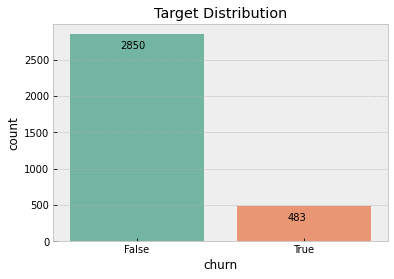

In [16]:
ax = sns.countplot('churn', data=data, palette='Set2')
for i in ax.patches:
    plt.text(i.get_x()+0.3, i.get_height()-200, str(i.get_height()), fontweight=20)
plt.title('Target Distribution');

**The Target Distribution is unbalanced**

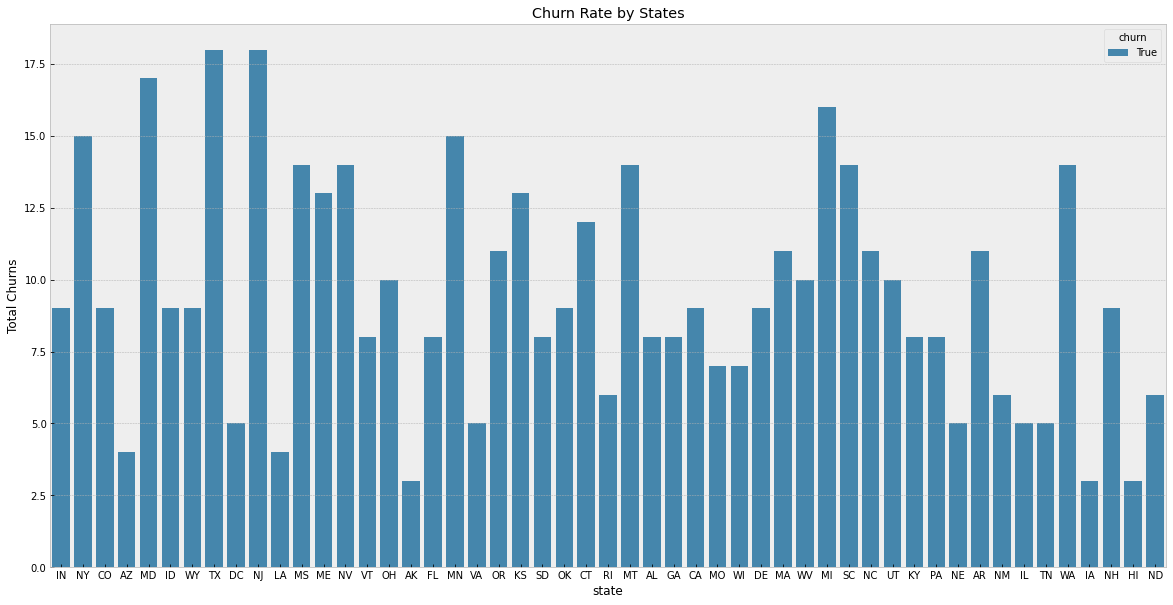

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='state',hue='churn', data=data[data['churn'] == 1])
plt.title('Churn Rate by States')
plt.ylabel('Total Churns');

In [18]:
state_churn_count = data.groupby('state').churn.sum().sort_values(ascending=False)

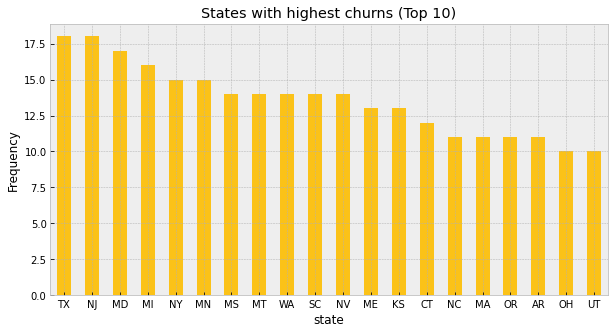

In [19]:
state_churn_count[:20].plot.bar(color='#fbc218', rot=0, figsize=(10,5), ylabel='Frequency', 
                                title='States with highest churns (Top 10)');

**Texas and New Jersey are the top states with the most churned customers**

**<u>Churn Rates by state</u>**
<br>Let's see the likelihood of churns by states ie given a state what is the probability that that customer will churn

In [20]:
state_churn_rate = data.groupby('state').churn.mean().sort_values(ascending=False)

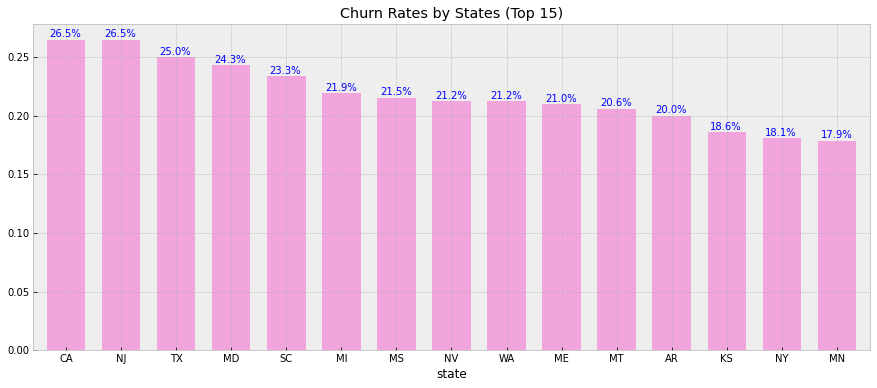

In [21]:
ax = state_churn_rate[:15].plot.bar(figsize=(15,6), color='#f29dda', alpha=0.9, width=0.7, rot=0,
                                    title='Churn Rates by States (Top 15)')
for i in ax.patches:
    plt.annotate(str(round(i.get_height()*100,1))+'%', (i.get_x()+0.05, i.get_height()+0.002), color='b');

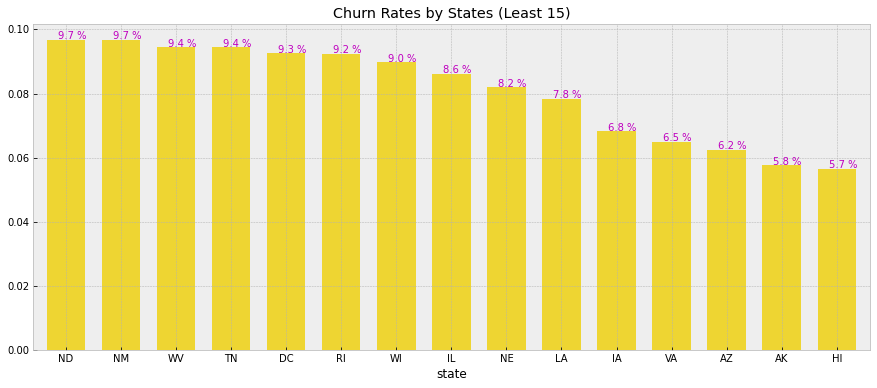

In [22]:
ax = state_churn_rate[-15:].plot.bar(figsize=(15,6), color='#eed31d', alpha=0.9, width=0.7, rot=0,
                                    title='Churn Rates by States (Least 15)')
for i in ax.patches:
    plt.annotate(str(round(i.get_height()*100,1))+' %', (i.get_x()+0.2, i.get_height()+0.0002), color='m', fontweight=20);

<b>In as much as California has lower number of churns it ranks high amongst states with the highest churn rate.</b><br>
<b>Hawaii (Hi) is the state with the least churn rate, followed by Arkansas (AK). Customers from both states have a 6% chance to churn.</b>

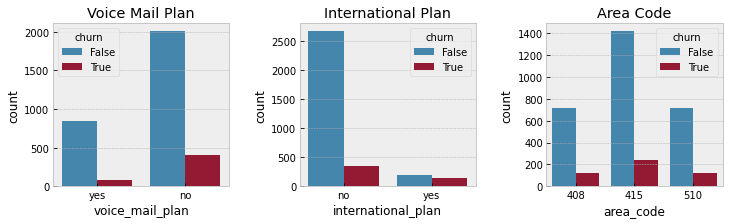

In [23]:
plt.figure(figsize=(12,3))
plt.subplot(131)
sns.countplot('voice_mail_plan', data=data, hue='churn')
plt.title('Voice Mail Plan')
plt.subplot(132)
sns.countplot('international_plan', data=data, hue='churn')
plt.title('International Plan')
plt.subplot(133)
sns.countplot('area_code', data=data, hue='churn')
plt.title('Area Code')
plt.subplots_adjust(wspace=0.4);

<pre>
1. Customers without any voice mail plan have greater likelihood of churning
2. Customers without any international plan have higher chance of churning
3. Customers located in  Area code 415, churn more than others.
</pre>

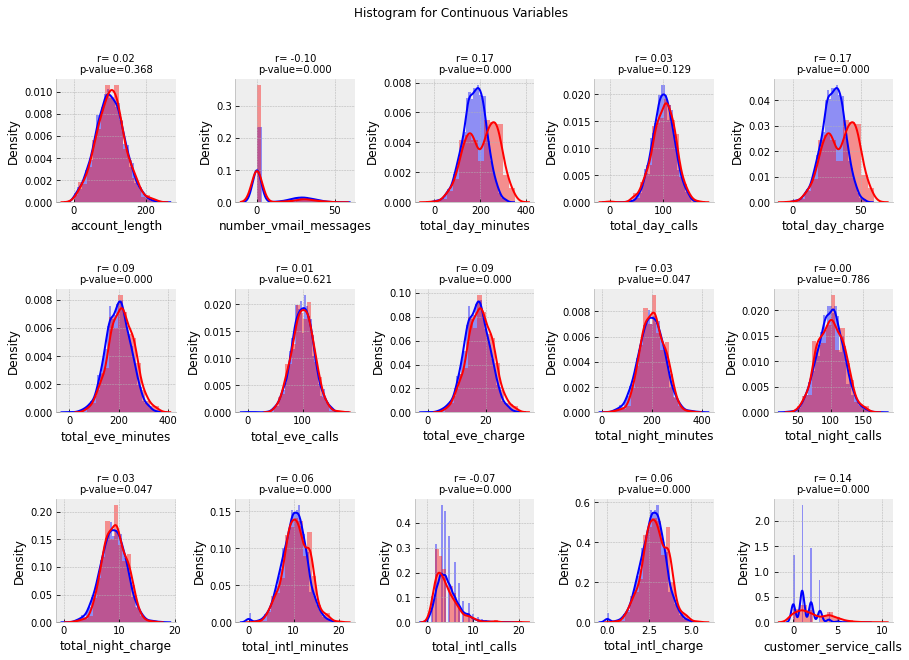

In [24]:
plt.figure(figsize=(15,10))
for i, col in enumerate(data.select_dtypes('number').columns.drop('area_code'), start=1):
    plt.subplot(3,5,i)
    sns.distplot(data[data.churn == 0][col], color='b', kde=True)
    sns.distplot(data[data.churn == 1][col], color='r', kde=True)
    plt.title('r= {0:.2f}\np-value={1:.3f}'.format(
        scipy_stats.spearmanr(data.churn, data[col])[0],
        scipy_stats.spearmanr(data.churn, data[col])[1]), fontsize=10) #spearman correlation
plt.subplots_adjust(wspace=0.5, hspace=0.7)
sns.despine()
plt.suptitle('Histogram for Continuous Variables');

Customers who spend higher call time and are charged more tend to churn. <br>
There seems to be some redundant features -they have the same correlation with the target variable. These features are the call times and call charges. We will create another feature from them such as the charge_per_minute, and then we drop one of them.

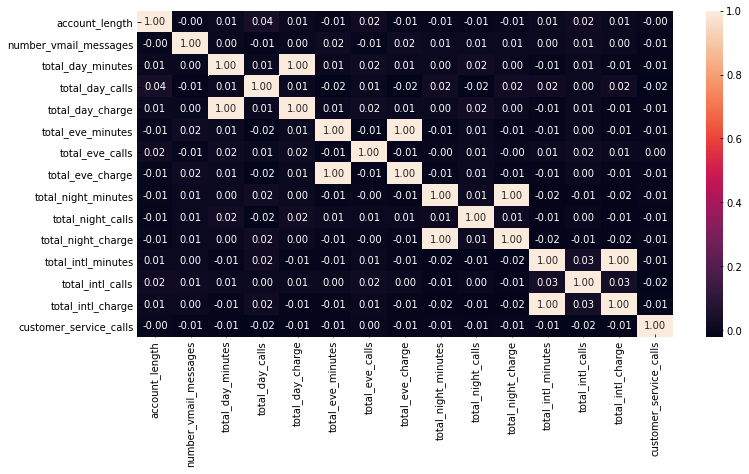

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(data.select_dtypes('number').drop('area_code', 1).corr(), annot=True, fmt='.2f');

**Feature Engineering**

##### Total calls, charges, minutes
For this I won't be adding the international calls, charges or minutes because they should be inclusive in any times of the day the customer made the call.

In [26]:
data['TotalCalls'] = data.total_day_calls + data.total_eve_calls + data.total_night_calls
data['TotalCharges'] = data.total_day_charge + data.total_eve_charge + data.total_night_charge
data['Total_call_mins'] = data.total_day_minutes + data.total_eve_minutes + data.total_night_minutes

##### Minutes per call

In [27]:
data['Night_mins_per_call'] = data.total_night_minutes /data.total_night_calls
data['Day_mins_per_call'] = data.total_day_minutes / data.total_day_calls
data['Eve_mins_per_call'] =   data.total_eve_minutes  / data.total_eve_calls
data['Intl_mins_per_call'] =  data.total_intl_minutes / data.total_intl_calls
data['Tot_mins_per_call'] =  data.Total_call_mins / data.TotalCalls

##### Charges per minute

In [28]:
data['Night_Charges_per_mins'] = data.total_night_charge / data.total_night_minutes 
data['Day_Charges_per_mins'] = data.total_day_charge / data.total_day_minutes
data['Eve_Charges_per_mins'] =  data.total_eve_charge / data.total_eve_minutes 
data['Intl_Charges_per_mins'] =  data.total_intl_charge / data.total_intl_minutes
data['Tot_charges_per_mins'] = data.TotalCharges / data.Total_call_mins

In [29]:
data.fillna(0, inplace=True) #filling in null values with zeros

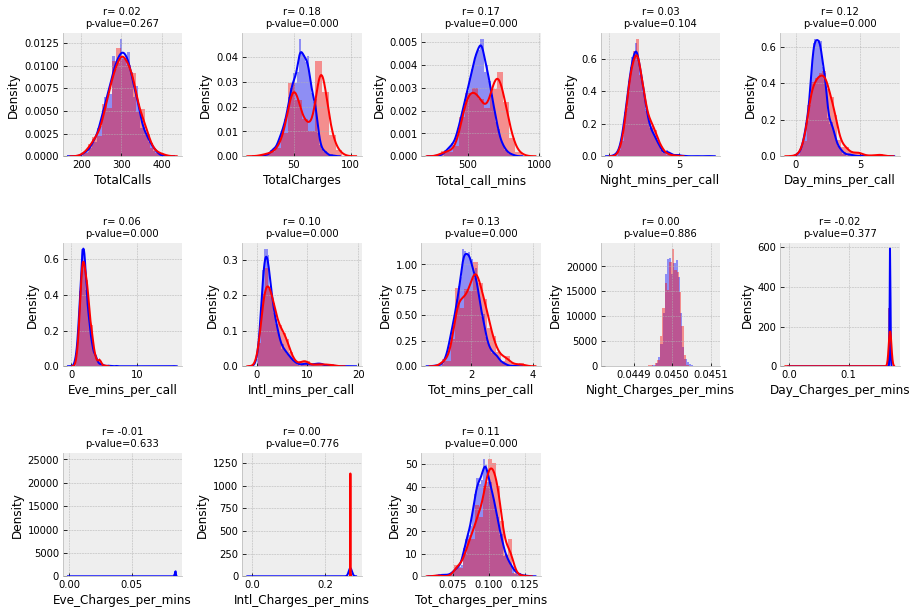

In [30]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns[-13:], 1):
    plt.subplot(3,5,i)
    sns.distplot(data[data.churn == 0][col], color='b', kde=True)
    sns.distplot(data[data.churn == 1][col], color='r', kde=True)
    plt.title('r= {0:.2f}\np-value={1:.3f}'.format(
        scipy_stats.spearmanr(data.churn, data[col])[0],
        scipy_stats.spearmanr(data.churn, data[col])[1]), fontsize=10) #spearman correlation
plt.subplots_adjust(wspace=0.5, hspace=0.7)
sns.despine()

In [31]:
drop = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'area_code']

In [32]:
mask = np.triu(data.select_dtypes('number').drop(drop,1).corr(),)

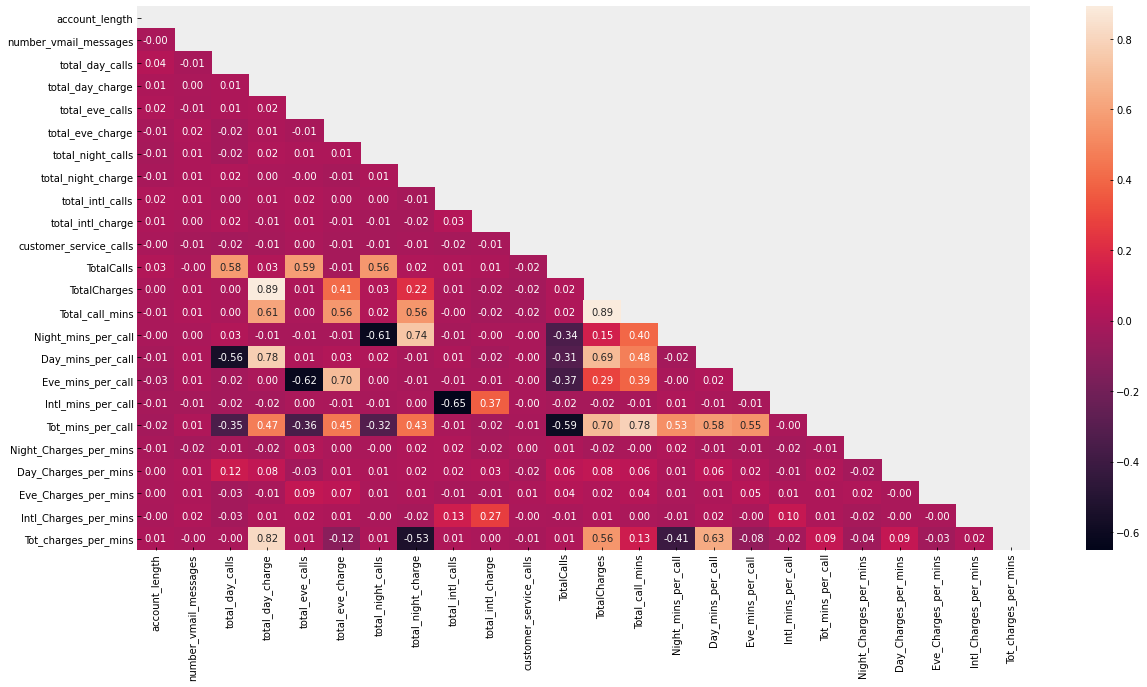

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(data.select_dtypes('number').drop(drop,1).corr(), annot=True, fmt='.2f', mask=mask);

In [34]:
data.head(2)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,TotalCalls,TotalCharges,Total_call_mins,Night_mins_per_call,Day_mins_per_call,Eve_mins_per_call,Intl_mins_per_call,Tot_mins_per_call,Night_Charges_per_mins,Day_Charges_per_mins,Eve_Charges_per_mins,Intl_Charges_per_mins,Tot_charges_per_mins
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,300,72.86,707.2,2.689011,2.410000,1.993939,3.333333,2.357333,0.044994,0.170011,0.085005,0.270000,0.103026
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False,329,55.54,611.5,2.469903,1.313821,1.898058,4.566667,1.858663,0.045008,0.169988,0.085013,0.270073,0.090826


In [35]:
data[['international_plan', 'voice_mail_plan']] = data[['international_plan', 'voice_mail_plan']].apply(
    lambda x: [0 if i == 'no' else 1 for i in x])

In [36]:
#has international and voicemail plans
data['intl_voicemail_plan'] = data.international_plan * data.voice_mail_plan 

In [37]:
drop_cols = ['phone_number', 'total_day_minutes', 'total_eve_minutes', 
             'total_night_minutes', 'total_intl_minutes'] #columns to drop

**Correlation Matrix**

In [38]:
corr = data.drop(drop, 1).corr('spearman')

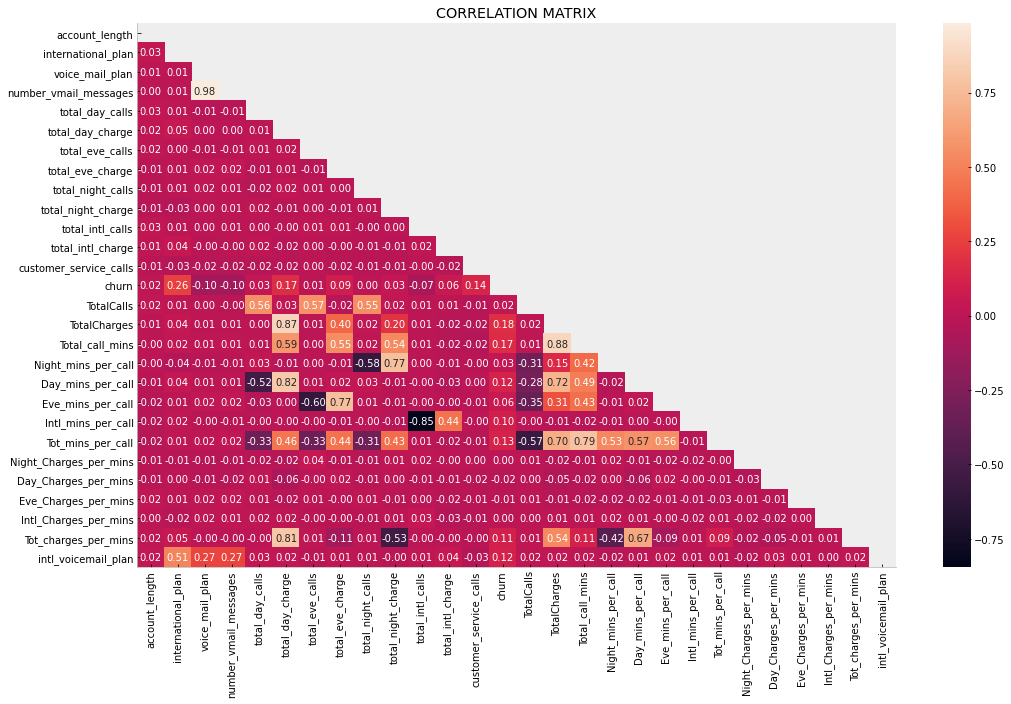

In [39]:
plt.figure(figsize=(17,10))
sns.heatmap(corr, mask=np.triu(corr), fmt='.2f', annot=True)
sns.despine()
plt.title('CORRELATION MATRIX');

There's a strong relationship b/w the number of voicemail messages and if the customer has a voicemail plan or not

In [40]:
#saving data
data.to_csv(path+'./Orange_Telcom_churn_cleaned.csv', index=False)